In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

## Given Data

In [2]:
E = np.linspace(2,4,11)
E_plot = np.linspace(2,4,100)
DeltaE = 0.2
pt1 = 20    #in s
pt2 = 60    #in s
pt3 = 180   #in s
ct = 100    #in ns

counts1 = np.array([
1275,
897,
727,
1457,
4545,
5196,
1473,
356,
316,
295,
286
])

counts2 = np.array([
1237,
792,
819,
2993,
6352,
3478,
549,
303,
371,
334,
281,
])

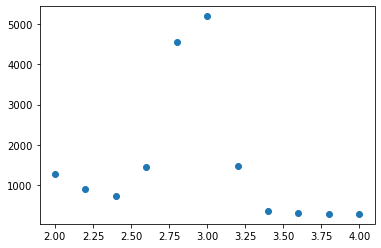

In [3]:
plt.scatter(E, counts1)
plt.show()

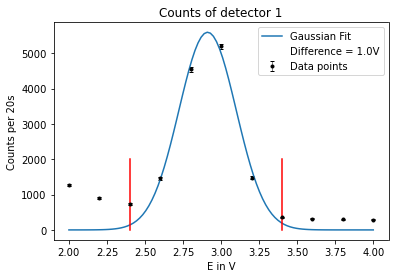

In [4]:
def single_peak(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/2/sigma**2)

popt_gaus_1, pcov_gaus_1 = curve_fit(single_peak, E, counts1, p0=[5000, 3, 0.25])
perr_gaus_1 = np.sqrt(np.diag(pcov_gaus_1))

plt.title('Counts of detector 1')
plt.ylabel('Counts per 20s')
plt.xlabel('E in V')

#plt.scatter(E, counts1)
plt.errorbar(E, counts1, yerr = np.sqrt(counts1), fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot(E_plot, single_peak(E_plot, *popt_gaus_1), label = 'Gaussian Fit')
#plt.plot([], [], ' ', label='$A$ = ' + str(np.round(popt_gaus_Cs[0] + bg_exp(popt_gaus_Cs[1], *popt_exp_Cs),3)))# + '$\pm$' + str(np.round(perr_gaus_Cs[0],3)))
#plt.plot([], [], ' ', label='$\mu$ = ' + str(np.round(popt_gaus_Cs[1],3)))# + '$\pm$' + str(np.round(perr_gaus_Cs[1],3)))
plt.plot(np.ones(2)*2.4, np.array([0, 2000]), c='r')
plt.plot(np.ones(2)*3.4, np.array([0, 2000]), c='r')
plt.plot([], [], ' ', label='Difference = ' + str(3.4-2.4) + 'V')
plt.legend()
plt.show()

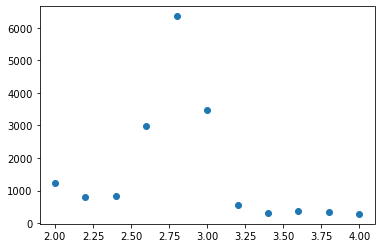

In [5]:
plt.scatter(E, counts2)
plt.show()

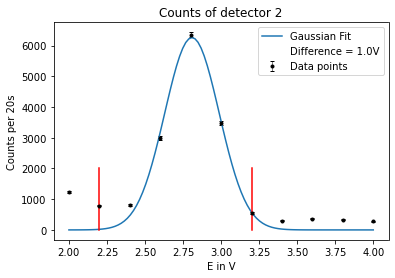

In [6]:
popt_gaus_2, pcov_gaus_2 = curve_fit(single_peak, E, counts2, p0=[6000, 2.75, 0.25])
perr_gaus_2 = np.sqrt(np.diag(pcov_gaus_2))

plt.title('Counts of detector 2')
plt.ylabel('Counts per 20s')
plt.xlabel('E in V')

plt.errorbar(E, counts2, yerr = np.sqrt(counts2), fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot(E_plot, single_peak(E_plot, *popt_gaus_2), label = 'Gaussian Fit')
plt.plot(np.ones(2)*2.2, np.array([0, 2000]), c='r')
plt.plot(np.ones(2)*3.2, np.array([0, 2000]), c='r')
plt.plot([], [], ' ', label='Difference = ' + str(3.2-2.2) + 'V')
plt.legend()
plt.show()

### Angular correlation

In [7]:
R1 = np.array([
41526,
41079,
41005,
41182,
40886,
40908,
40490,
35882,
40395,
39897,
40026,
40145,
39790
])

R2 = 40947

theta = np.array([
150,
155,
160,
165,
170,
175,
180,
185,
190,
195,
200,
205,
210
])

Rcoin = np.array([
330,
945,
4414,
7958,
28274,
37666,
39918,
29401,
17674,
10344,
2450,
466,
301
])

DeltaRcoin = np.sqrt(Rcoin)/pt3
a = np.sqrt(R1)/pt2
DeltaR1 = np.sqrt(R1)/pt2
DeltaR2 = np.sqrt(R2)/pt2

Rcoin = Rcoin/pt3
R1 = R1/pt2
b = np.sqrt(R1/pt2)    # Same as a
R2 = R2/pt2

In [8]:
Rtrue = Rcoin - R1*R2*(ct/1e9)
DeltaRtrue = DeltaRcoin - DeltaR1*R2*ct/1e9 - R1*DeltaR2*ct/1e9

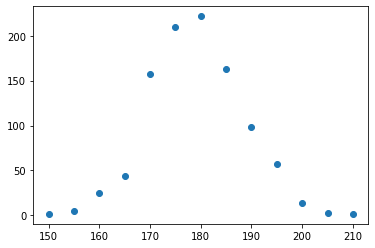

In [9]:
plt.scatter(theta, Rtrue)
plt.show()

In [10]:
theta_plot = np.linspace(150,210,100)

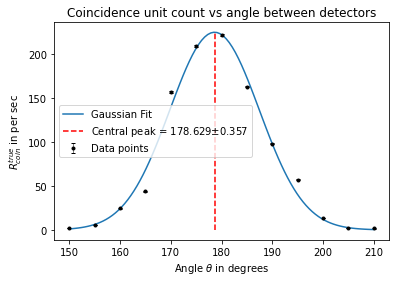

In [11]:
popt_gaus_coin, pcov_gaus_coin = curve_fit(single_peak, theta, Rtrue, p0=[40000, 180, 10])
perr_gaus_coin = np.sqrt(np.diag(pcov_gaus_coin))

plt.title('Coincidence unit count vs angle between detectors')
plt.ylabel('$R^{true}_{coin}$ in per sec')
plt.xlabel('Angle $\\theta$ in degrees')

plt.errorbar(theta, Rtrue, yerr = DeltaRtrue, fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot(theta_plot, single_peak(theta_plot, *popt_gaus_coin), label = 'Gaussian Fit')
plt.plot(np.ones(2)*popt_gaus_coin[1], np.array([0, popt_gaus_coin[0]]), '--r', 
         label='Central peak = ' + str(np.round(popt_gaus_coin[1],3)) + '$\pm$' + str(np.round(perr_gaus_coin[1], 3)))
plt.legend()
plt.show()

### Intrinsic efficiency

In [12]:
d = np.array([
10,
14,
17,
20,
22,
24,
26,
28,
30
])

countsd = np.array([
40490,
24093,
17232,
13160,
11149,
9794,
8407,
7680,
6545
])

Rd = countsd / pt2
DeltaRd = np.sqrt(Rd/pt2)

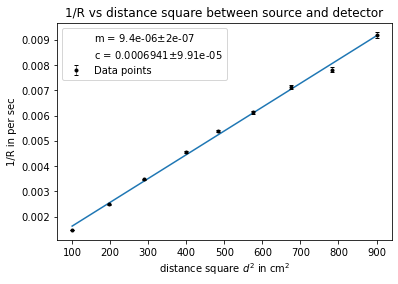

In [13]:
def lin_fit(x, m, c):
    return m*x + c

X = d**2
Y = 1/(Rd)
DeltaY = DeltaRd/(Rd**2)

popt_lin, pcov_lin = curve_fit(lin_fit, X, Y)
perr_lin = np.sqrt(np.diag(pcov_lin))

#plt.scatter(X,Y)
plt.plot(X, lin_fit(X, *popt_lin))

plt.title('1/R vs distance square between source and detector')
plt.ylabel('1/R in per sec')
plt.xlabel('distance square $d^2$ in cm$^2$')

plt.errorbar(X, Y, yerr = DeltaY, fmt='.k', capsize=2, elinewidth=0.5, label = "Data points")
plt.plot([], [], ' ', label='m = ' + str(np.round(popt_lin[0], 7)) + '$\pm$' + str(np.round(perr_lin[0], 7)))
plt.plot([], [], ' ', label='c = ' + str(np.round(popt_lin[1], 7)) + '$\pm$' + str(np.round(perr_lin[1], 7)))
plt.legend()
plt.show()

In [14]:
S = 20*1e-6
t = 13
thalf = 2.6
N0 = 3.7*1e10*S*np.exp(-0.693*t/thalf)
r = 2.54
print(N0)

epsilon = 4/(0.9*N0*r**2*popt_lin[0])
print(epsilon)

23142.02401548573
3.1680364774206793


In [15]:
epsilon*perr_lin[0]/popt_lin[0]

0.06056862780752869